In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
%pwd

'/run/media/fredericlagniez/Echanges_Linux_Windows/GitHUb/energetic-stress-production/data'

In [166]:
def visualisation_distrib_variable(df,nom_variable,figsize=(16,8)):   
    plt.figure(figsize=figsize)
    j=1
    plt.subplot(1, 3, j)
    sns.boxplot(df[nom_variable])
    plt.title(str(nom_variable))
    j+=1
    plt.subplot(1, 3, j)
    sns.violinplot(df[nom_variable])
    plt.title(str(nom_variable))
    j+=1
    plt.subplot(1, 3, j)
    sns.histplot(df[nom_variable],bins=100)
    plt.title(str(nom_variable))      
    plt.show()
    extract_outliers_from_boxplot(df[nom_variable],nom_variable)

def extract_outliers_from_boxplot(array,nom_variable):
    ## Get IQR
    iqr_q1 = np.quantile(array, 0.25)
    iqr_q3 = np.quantile(array, 0.75)
    med = np.median(array)

    # finding the iqr region
    iqr = iqr_q3-iqr_q1

    # finding upper and lower whiskers
    upper_bound = iqr_q3+(1.5*iqr)
    lower_bound = iqr_q1 -(1.5*iqr)

    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    print("Il y a ", len(outliers), " outliers dans la variable", nom_variable, "sur ", len(array), "échantillons." )
    if len(outliers) > 0:
        if len(outliers) <50:
            print('Outliers within the box plot are : {}'.format(outliers))
        else:
            print("Il y a trop d'outliers pour les afficher")
            
    return outliers

In [157]:
import pandas as pd

# Lire le fichier CSV avec pandas
df = pd.read_csv('rte_production.csv')
# Afficher les 5 premières lignes du DataFrame
#df.columns = df.columns[1:]
columns= df.columns[1:]
print(columns)
df.head(5)

Index(['Nature', 'Date', 'Heures', 'Consommation', 'Prévision J-1',
       'Prévision J', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien',
       'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques',
       'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne',
       'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.',
       'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG',
       'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz'],
      dtype='object')


/tmp/ipykernel_653/2262830918.py:4: DtypeWarning:

Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.



,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,Données définitives,2014-01-01,00:00,64660,63200,63200,454,0,2303,54144,...,1809,422,72,5662,2125,693,460,165,179,NaN
1,Données définitives,2014-01-01,00:30,63494,62100,61500,281,0,2367,54670,...,1847,438,83,5569,2450,495,592,170,181,NaN
2,Données définitives,2014-01-01,01:00,61362,59900,59900,281,0,2188,54000,...,1848,258,83,5457,2040,76,591,173,181,NaN
3,Données définitives,2014-01-01,01:30,61217,60600,60300,281,0,2190,54200,...,1853,255,83,5286,1849,0,595,174,180,NaN
4,Données définitives,2014-01-01,02:00,60748,59900,60200,281,0,2187,53975,...,1853,252,83,5201,1592,0,597,174,180,NaN


In [158]:
#regler le problème de décalage des données vers la droite

# Créer une liste de noms de colonnes
cols = df.columns.tolist()
# Supprimer le premier élément de la liste
first_col = cols.pop(0)
# Ajouter le premier élément à la fin de la liste
cols.append(first_col)
# Attribuer la liste de noms de colonnes modifiée au DataFrame
df.columns = cols
print(cols)
df.head()


['Nature', 'Date', 'Heures', 'Consommation', 'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse', 'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.', 'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG', 'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée', 'Hydraulique - Lacs', 'Hydraulique - STEP turbinage', 'Bioénergies - Déchets', 'Bioénergies - Biomasse', 'Bioénergies - Biogaz', 'Périmètre']


,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Périmètre
0,Données définitives,2014-01-01,00:00,64660,63200,63200,454,0,2303,54144,...,1809,422,72,5662,2125,693,460,165,179,NaN
1,Données définitives,2014-01-01,00:30,63494,62100,61500,281,0,2367,54670,...,1847,438,83,5569,2450,495,592,170,181,NaN
2,Données définitives,2014-01-01,01:00,61362,59900,59900,281,0,2188,54000,...,1848,258,83,5457,2040,76,591,173,181,NaN
3,Données définitives,2014-01-01,01:30,61217,60600,60300,281,0,2190,54200,...,1853,255,83,5286,1849,0,595,174,180,NaN
4,Données définitives,2014-01-01,02:00,60748,59900,60200,281,0,2187,53975,...,1853,252,83,5201,1592,0,597,174,180,NaN


In [159]:
#supprimer la colonne "Nature"#
df=df.drop(["Nature","Périmètre"],axis=1)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  17520 non-null  object
 1   Heures                                17520 non-null  object
 2   Consommation                          17520 non-null  int64 
 3   Prévision J-1                         17520 non-null  int64 
 4   Prévision J                           17520 non-null  int64 
 5   Fioul                                 17520 non-null  int64 
 6   Charbon                               17520 non-null  int64 
 7   Gaz                                   17520 non-null  int64 
 8   Nucléaire                             17520 non-null  int64 
 9   Eolien                                17520 non-null  int64 
 10  Solaire                               17520 non-null  int64 
 11  Hydraulique                 

In [190]:
df.describe()

,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,moyenne_mobile,jour,mois,dayofyear,moyenne_mobile_nucléaire
count,17519,17519,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,...,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17513.000000,17519.000000,17519.000000,17519.000000,17513.000000
mean,2014-07-02 00:07:43.588104192,1900-01-01 11:44:57.585478656,52779.527941,52324.783378,52298.607226,272.258691,955.826017,1627.767624,47432.235801,1947.413323,...,1911.250128,747.023460,497.962041,179.926994,179.421656,52774.577261,15.719733,6.526229,183.005366,47429.281937
min,2014-01-01 00:00:00,1900-01-01 00:00:00,29477.000000,28500.000000,28900.000000,197.000000,0.000000,410.000000,27116.000000,26.000000,...,108.000000,0.000000,332.000000,113.000000,136.000000,29987.000000,1.000000,1.000000,1.000000,27371.714286
25%,2014-04-02 00:00:00,1900-01-01 05:45:00,44396.500000,44000.000000,44000.000000,226.000000,0.000000,555.000000,43219.000000,844.000000,...,1174.000000,3.000000,429.000000,167.000000,173.000000,44380.000000,8.000000,4.000000,92.000000,43218.142857
50%,2014-07-02 00:00:00,1900-01-01 11:30:00,51831.000000,51400.000000,51400.000000,241.000000,736.000000,1133.000000,45891.000000,1535.000000,...,1768.000000,429.000000,475.000000,179.000000,178.000000,51797.000000,16.000000,7.000000,183.000000,45860.142857
75%,2014-10-01 00:00:00,1900-01-01 17:30:00,60120.500000,59600.000000,59500.000000,279.000000,1711.000000,2148.000000,52316.500000,2626.000000,...,2481.000000,1302.000000,583.000000,192.000000,185.000000,60268.857143,23.000000,10.000000,274.000000,52309.857143
max,2014-12-31 00:00:00,1900-01-01 23:30:00,82607.000000,83200.000000,82300.000000,2008.000000,4532.000000,7366.000000,61232.000000,7379.000000,...,5693.000000,4179.000000,648.000000,237.000000,224.000000,80186.285714,31.000000,12.000000,365.000000,61139.285714
std,NaN,NaN,10870.068147,10815.259767,10751.496442,119.931894,950.703184,1359.686331,6082.328894,1465.856160,...,971.499679,822.156813,81.642122,19.651350,10.866081,10658.748597,8.796087,3.447945,105.369650,6051.157427


In [162]:
display(df.isna().sum())
#pas de valeurs manquantes
print(df.isna().sum().sum())

Date                                    0
Heures                                  0
Consommation                            0
Prévision J-1                           0
Prévision J                             0
Fioul                                   0
Charbon                                 0
Gaz                                     0
Nucléaire                               0
Eolien                                  0
Solaire                                 0
Hydraulique                             0
Pompage                                 0
Bioénergies                             0
Ech. physiques                          0
Taux de Co2                             0
Ech. comm. Angleterre                   1
Ech. comm. Espagne                      1
Ech. comm. Italie                       1
Ech. comm. Suisse                       1
Ech. comm. Allemagne-Belgique           1
Fioul - TAC                             0
Fioul - Cogén.                          0
Fioul - Autres                    

5


In [163]:
df=df.dropna()

In [155]:
df.head()

,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Périmètre


In [164]:
df.duplicated().sum()
#pas de doublons

0

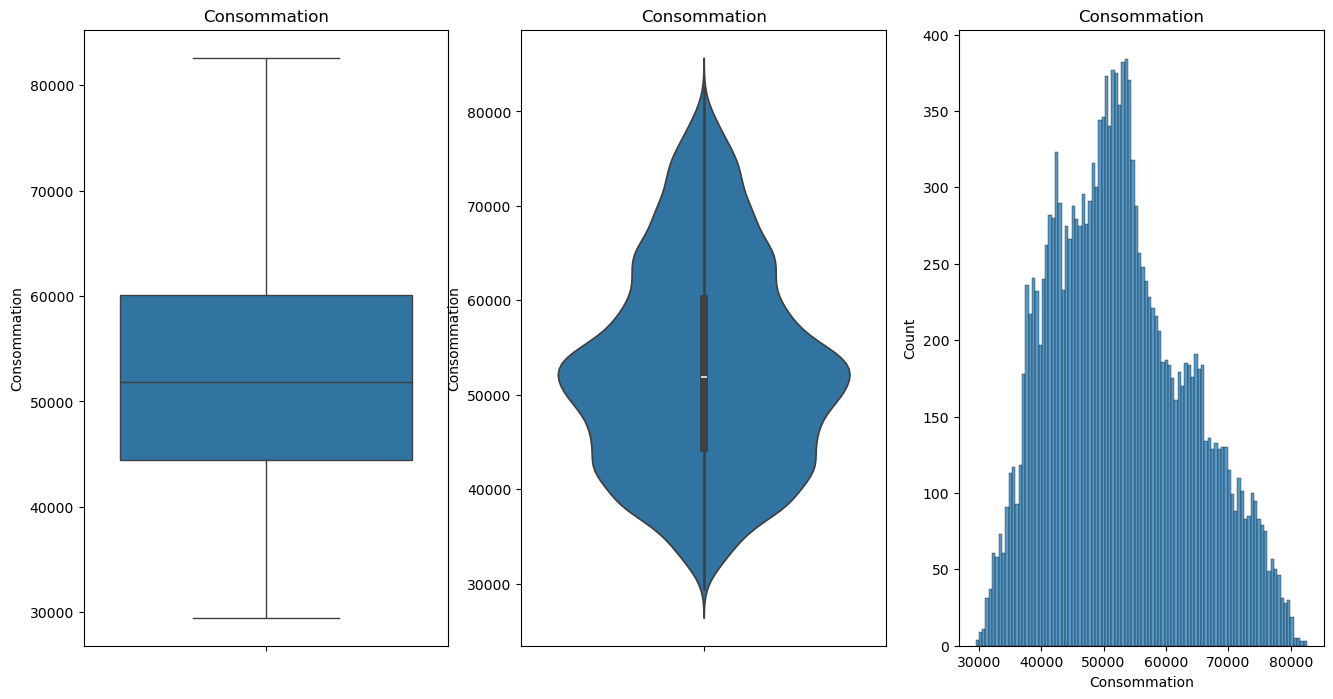

Il y a  0  outliers dans la variable Consommation sur  17519 échantillons.


In [167]:
#Visualisation de la consommation et des outliers
visualisation_distrib_variable(df,"Consommation")

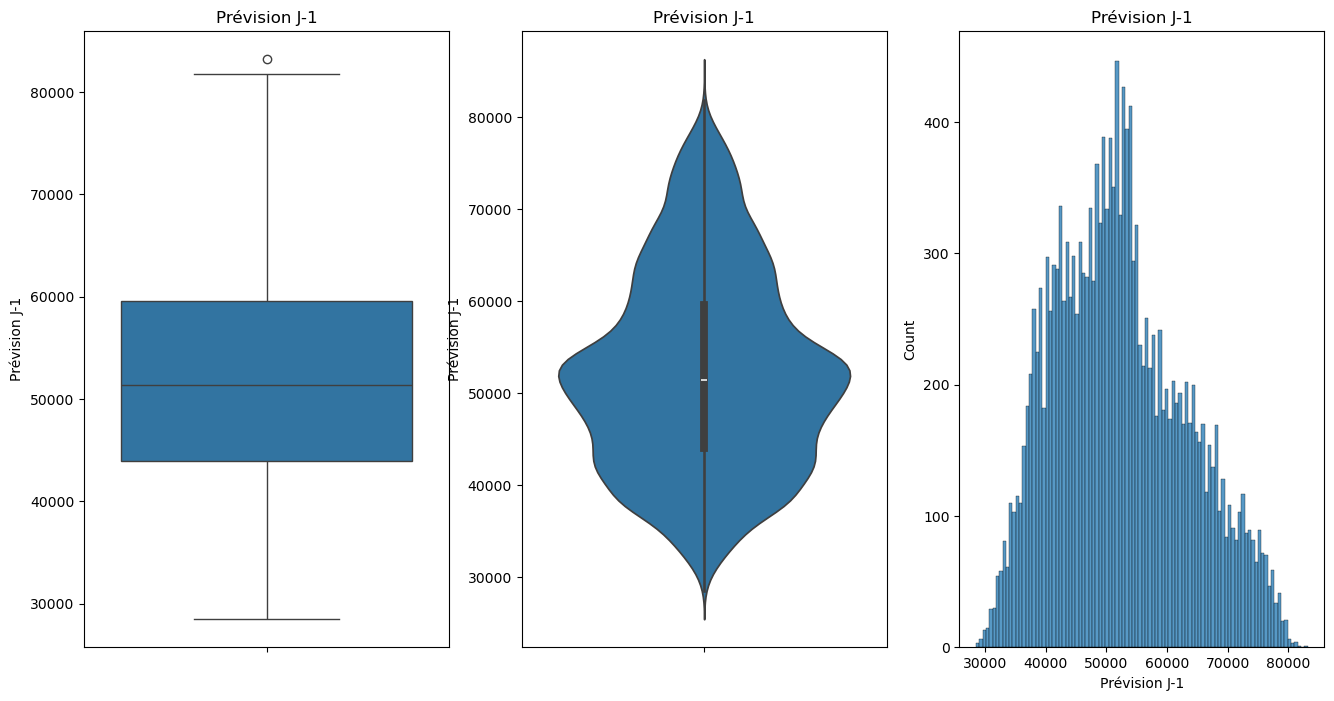

Il y a  1  outliers dans la variable Prévision J-1 sur  17519 échantillons.
Outliers within the box plot are : 1382    83200
Name: Prévision J-1, dtype: int64


In [189]:
#Visualisation de la consommation et des outliers
visualisation_distrib_variable(df,"Prévision J-1")

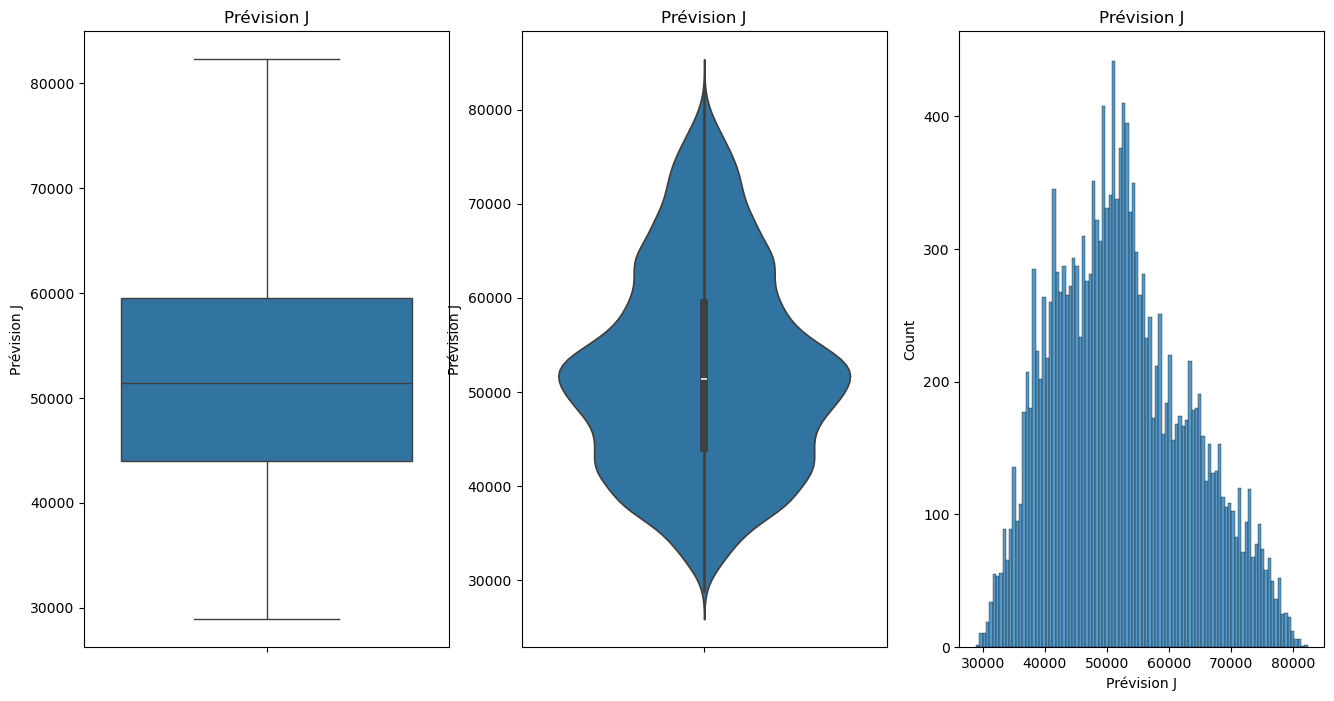

Il y a  0  outliers dans la variable Prévision J sur  17519 échantillons.


In [192]:
#Visualisation de la consommation et des outliers
visualisation_distrib_variable(df,"Prévision J")

In [ ]:
df["several_defaut"].value_counts(normalize=True)

In [173]:
#Convertir les colonnes en datetime

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()
df['Heures'] = pd.to_datetime(df['Heures'], format='%H:%M')
df.head()

# Créer une colonne 'jour' à partir de la colonne 'date'
df['jour'] = df['Date'].dt.day
# Créer une colonne 'mois' à partir de la colonne 'date'
df['mois'] = df['Date'].dt.month

df['dayofyear'] = df['Date'].dt.dayofyear


In [126]:
df.head()

,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,jour,mois,annee
0,2014-01-01,1900-01-01 00:00:00,64660,63200,63200,454,0,2303,54144,3470,...,72,5662,2125,693,460,165,179,1,1,2014
1,2014-01-01,1900-01-01 00:30:00,63494,62100,61500,281,0,2367,54670,3356,...,83,5569,2450,495,592,170,181,1,1,2014
2,2014-01-01,1900-01-01 01:00:00,61362,59900,59900,281,0,2188,54000,3329,...,83,5457,2040,76,591,173,181,1,1,2014
3,2014-01-01,1900-01-01 01:30:00,61217,60600,60300,281,0,2190,54200,3254,...,83,5286,1849,0,595,174,180,1,1,2014
4,2014-01-01,1900-01-01 02:00:00,60748,59900,60200,281,0,2187,53975,3245,...,83,5201,1592,0,597,174,180,1,1,2014


In [180]:
import plotly.graph_objects as go

#df_janvier = df[df["mois"] == 1]

# Créer une figure
fig = go.Figure()

# Ajouter une trace de diagramme temporel
fig.add_trace(go.Scatter(
    x=df['dayofyear'],  # Colonne contenant les données temporelles
    y=df['Consommation'],  # Colonne contenant les valeurs à tracer
    mode='lines',  # Type de trace (lignes)
    name='Données de production réelles pour le Nucléaire',  # Nom de la trace pour la légende
    line=dict(color='blue', width=2)  # Options de mise en forme de la ligne
))

# Définir les options de mise en forme de l'axe des x
fig.update_xaxes(
    title_text='Jour de l\'année',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['dayofyear'].min(), df['dayofyear'].max()],
    dtick=30  # Intervalle entre les étiquettes de l'axe des x (en jours)
)

# Définir les options de mise en forme de l'axe des y
fig.update_yaxes(
    title_text='Consommation réelle (kWh)',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['Consommation'].min()-10, df['Consommation'].max()+10]  # Marge autour de la plage de données
)

# Ajouter une annotation pour afficher la source des données
fig.add_annotation(
    text='Source: Données de consommation réelle d"énergie',
    x=0,
    y=-0.1,
    xref='paper',
    yref='paper',
    showarrow=False,
    font=dict(size=14, color='gray')
)

# Définir les options de mise en forme de la légende
fig.update_layout(
    title="Diagramme temporel de la Consommation d'Energie",
    title_font=dict(size=24),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Afficher la figure
fig.show()


In [181]:
# Créer une figure
fig = go.Figure()

# Ajouter une trace de diagramme temporel
fig.add_trace(go.Scatter(
    x=df['dayofyear'],  # Colonne contenant les données temporelles
    y=df['Nucléaire'],  # Colonne contenant les valeurs à tracer
    mode='lines',  # Type de trace (lignes)
    name='Données de production réelles pour le Nucléaire',  # Nom de la trace pour la légende
    line=dict(color='blue', width=2)  # Options de mise en forme de la ligne
))

# Définir les options de mise en forme de l'axe des x
fig.update_xaxes(
    title_text='Jour de l\'année',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['dayofyear'].min(), df['dayofyear'].max()],
    dtick=30  # Intervalle entre les étiquettes de l'axe des x (en jours)
)

# Définir les options de mise en forme de l'axe des y
fig.update_yaxes(
    title_text='Consommation réelle (kWh)',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['Nucléaire'].min()-10, df['Nucléaire'].max()+10]  # Marge autour de la plage de données
)

# Ajouter une annotation pour afficher la source des données
fig.add_annotation(
    text='Source: Données de production réelles pour le Nucléaire',
    x=0,
    y=-0.1,
    xref='paper',
    yref='paper',
    showarrow=False,
    font=dict(size=14, color='gray')
)

# Définir les options de mise en forme de la légende
fig.update_layout(
    title='Diagramme temporel de la production pour le Nucléaire',
    title_font=dict(size=24),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Afficher la figure
fig.show()


In [188]:
# Calculer la moyenne mobile sur une fenêtre glissante de 7 jours
df['moyenne_mobile_nucléaire'] = df['Nucléaire'].rolling(window=7).mean()

# Créer une figure
fig = go.Figure()

# Ajouter une trace de diagramme temporel
fig.add_trace(go.Scatter(
    x=df['dayofyear'],  # Colonne contenant les données temporelles
    y=df['moyenne_mobile_nucléaire'],  # Colonne contenant les valeurs à tracer
    mode='lines',  # Type de trace (lignes)
    name='Données de production réelles pour le Nucléaire',  # Nom de la trace pour la légende
    line=dict(color='blue', width=2)  # Options de mise en forme de la ligne
))

# Définir les options de mise en forme de l'axe des x
fig.update_xaxes(
    title_text='Jour de l\'année',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['dayofyear'].min(), df['dayofyear'].max()],
    dtick=30  # Intervalle entre les étiquettes de l'axe des x (en jours)
)

# Définir les options de mise en forme de l'axe des y
fig.update_yaxes(
    title_text='Consommation réelle (kWh)',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['moyenne_mobile_nucléaire'].min()-10, df['moyenne_mobile_nucléaire'].max()+10]  # Marge autour de la plage de données
)

# Ajouter une annotation pour afficher la source des données
fig.add_annotation(
    text='Source: Données de production réelles pour le Nucléaire',
    x=0,
    y=-0.1,
    xref='paper',
    yref='paper',
    showarrow=False,
    font=dict(size=14, color='gray')
)

# Définir les options de mise en forme de la légende
fig.update_layout(
    title='Diagramme temporel de la production pour le Nucléaire, moyenne sur 7 jours',
    title_font=dict(size=24),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Afficher la figure
fig.show()


In [195]:
#Ecart production Consommation - Prévision J-1

# Calculer la différence entre la prédriction et la consommation
df['difference'] = df['Prévision J-1'] - df['Consommation']

# Créer une figure
fig = go.Figure()

# Ajouter une trace de diagramme temporel
fig.add_trace(go.Scatter(
    x=df['dayofyear'],  # Colonne contenant les données temporelles
    y=df['difference'],  # Colonne contenant les valeurs à tracer
    mode='lines',  # Type de trace (lignes)
    name='Différence et prédiction et prévisions pour le mix global',  # Nom de la trace pour la légende
    line=dict(color='blue', width=2)  # Options de mise en forme de la ligne
))

# Définir les options de mise en forme de l'axe des x
fig.update_xaxes(
    title_text='Jour de l\'année',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['dayofyear'].min(), df['dayofyear'].max()],
    dtick=30  # Intervalle entre les étiquettes de l'axe des x (en jours)
)

# Définir les options de mise en forme de l'axe des y
fig.update_yaxes(
    title_text='Consommation réelle (kWh)',
    title_font=dict(size=18),
    tickfont=dict(size=14),
    range=[df['difference'].min()-10, df['difference'].max()+10]  # Marge autour de la plage de données
)

# Ajouter une annotation pour afficher la source des données
fig.add_annotation(
    text='Source: ifference',
    x=0,
    y=-0.1,
    xref='paper',
    yref='paper',
    showarrow=False,
    font=dict(size=14, color='gray')
)

# Définir les options de mise en forme de la légende
fig.update_layout(
    title='Différence et prédiction et prévisions pour le mix global',
    title_font=dict(size=24),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Afficher la figure
fig.show()


In [228]:
# Calculer la moyenne du bruit
moyenne_bruit = df['difference'].mean()
moyenne_consommation=df['Consommation'].mean()

# Définir le seuil de tolérance
tolerance = 0.05

# Vérifier si la moyenne du bruit est proche de zéro
if abs(moyenne_bruit) < tolerance* moyenne_consommation:
    print("Le bruit est centré sur zéro.")
    print("La pourcentage du bruit par rapport à la consommation est", round(abs(moyenne_bruit/moyenne_consommation)*100), "%")
else:
    print("Le bruit n'est pas centré sur zéro.")
    print("La pourcentage du bruit par rapport à la consommation est", round(abs(moyenne_bruit/moyenne_consommation)*100), "%")


Le bruit est centré sur zéro.
La pourcentage du bruit par rapport à la consommation est 1 %


In [208]:
# Calculer la production  par filière
#ex Gaz

# Calculer la production totale
production_totale = df['Consommation'].sum()

# Extraire la production de la filière "Solaire"
production_Gaz = df['Gaz'].sum()

# Calculer la part de la filière "Solaire" dans la production totale
part_Gaz = (production_Gaz/ production_totale) * 100

# Afficher le résultat
print("La part de la filière Gaz dans la production totale est de :", round(part_Gaz, 2), "%")


La part de la filière Gaz dans la production totale est de : 3.08 %


In [212]:
#recap

# Lire le fichier CSV avec pandas
df = pd.read_csv('rte_production.csv')

#regler le problème de décalage des données vers la droite
# Créer une liste de noms de colonnes
cols = df.columns.tolist()
# Supprimer le premier élément de la liste
first_col = cols.pop(0)
# Ajouter le premier élément à la fin de la liste
cols.append(first_col)
# Attribuer la liste de noms de colonnes modifiée au DataFrame
df.columns = cols
print(cols)
df.head()

#supprimer les colonne "Nature" et Périmètre
df=df.drop(["Nature","Périmètre"],axis=1)

#supprimer les qualques NaN
df=df.dropna()

#Convertir les colonnes en datetime

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()
df['Heures'] = pd.to_datetime(df['Heures'], format='%H:%M')
df.head()

#Création de colonnes
# Créer une colonne 'jour' à partir de la colonne 'date'
df['jour'] = df['Date'].dt.day
# Créer une colonne 'mois' à partir de la colonne 'date'
df['mois'] = df['Date'].dt.month
# Créer une colonne 'dayofyear' à partir de la colonne 'date'
df['dayofyear'] = df['Date'].dt.dayofyear

# Calculer la différence entre la prédriction et la consommation
df['difference'] = df['Prévision J-1'] - df['Consommation']

#Colonne heure pas utilisée

#Transformation et prétraitement : cela dépends de ce qu'on veut en faire


['Nature', 'Date', 'Heures', 'Consommation', 'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse', 'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.', 'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG', 'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée', 'Hydraulique - Lacs', 'Hydraulique - STEP turbinage', 'Bioénergies - Déchets', 'Bioénergies - Biomasse', 'Bioénergies - Biogaz', 'Périmètre']


/tmp/ipykernel_653/1464445295.py:4: DtypeWarning:

Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.

